<a href="https://colab.research.google.com/github/ravichas/AMPL-Tutorial/blob/master/combine_data_step_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring and combining HTR3A protein target activity data from ExcapeDB and DTC databases. 

The Target specific data was downloaded from https://zenodo.org/record/173258#.X_44kuhKi70

Please refer to the ExCAPE-DB publication (https://pubmed.ncbi.nlm.nih.gov/28316655/) for details about the database 

Here are some details about HTR3A gene (taken from RefSeq NCBI)
*The product of this gene belongs to the ligand-gated ion channel receptor superfamily. This gene encodes subunit A of the type 3 receptor for 5-hydroxytryptamine (serotonin), a biogenic hormone that functions as a neurotransmitter, a hormone, and a mitogen. This receptor causes fast, depolarizing responses in neurons after activation. It appears that the heteromeric combination of A and B subunits is necessary to provide the full functional features of this receptor, since either subunit alone results in receptors with very low conductance and response amplitude. Alternatively spliced transcript variants encoding different isoforms have been identified.*

## Basic information about HTR3A gene:

**Present in** Chromosome 11
**Exon count:** 10

mRNA and protein information

*   NM_000869.6 → NP_000860.3 
*   NM_001161772.3 → NP_001155244.1
*   NM_213621.4 → NP_998786.3 








# Before you begin, make sure you close all other COLAB notebooks. 

# Change Runtime settings

## Plesae change your runtime settings to use GPU and high-memory, if you have 

## Runtime --> Change Runtime Type --> GPU wityh high-RAM

In [ ]:
!date # starting time

Thu Feb 18 20:56:13 UTC 2021


## Install AMPL GPU version

```
real	2m59.739s
user	1m48.995s
sys	0m20.614s
```

In [ ]:
import requests

# Copy AMPL install script
url='https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU.sh'

downloaded_obj = requests.get(url)
with open("install_AMPL_GPU.sh", "wb") as file:
    file.write(downloaded_obj.content)


# Install and load AMPL
!chmod u+x install_AMPL_GPU.sh
!time ./install_AMPL_GPU.sh
import sys
if '/content/AMPL/lib/python3.6/site-packages' not in sys.path:
    sys.path.insert(1, '/content/AMPL/lib/python3.6/site-packages')

sys.path

--2021-02-18 20:56:14--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94235922 (90M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  89.87M   148MB/s    in 0.6s    

2021-02-18 20:56:14 (148 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [94235922/94235922]

PREFIX=/content/AMPL
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /content/AMPL

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - brotlipy==0.7.0=py38h27cfd23_1003
    - ca-certificates==2020.10.14=0
    - certifi==2020.6.20=pyhd3eb1b0_3
    - cffi==1.14.3=py38h261ae71_2
    - chardet==3.0.4=py38h06a4308_1003
    - conda-package-han

['',
 '/content/AMPL/lib/python3.6/site-packages',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

## Exploring target activity data from selected database
## Data source = ExcapeDB
## Target activity for the receptor HTR3A

In [ ]:
# There is a problem with the previously imported cffi, so delete it and 
# load it with AMPL instead
if 'cffi' in sys.modules:
  del sys.modules['cffi']

In [ ]:
# We temporarily disable warnings for demonstration.
# FutureWarnings and DeprecationWarnings are present from some of the AMPL 
# dependency modules.
import warnings
warnings.filterwarnings('ignore')

import json
# import numpy as np
# import pandas as pd
import os
import requests

In [ ]:
#
# Import AMPL libraries
# 
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass,os

/content/AMPL/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
from matplotlib_venn import venn2
import getpass, os
import pandas as pd
import matplotlib.pyplot as plt
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.chem_diversity as cd

## Select a target to work with 
### (e.g. PDE2A, KCNH2, SCNA5)

In [ ]:
target_name='HTR3A'

In [ ]:
import io
url2 = 'https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/datasets/HTR3A_excape_curated.csv'
download = requests.get(url2).content

# Reading the downloaded content and turning it into a pandas dataframe
d2_df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=',', header=0 )

url1 = 'https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/datasets/HTR3A_dtc_smiles_curated.csv'
download = requests.get(url1).content
# Reading the downloaded content and turning it into a pandas dataframe
d1_df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=',', header=0 )

In [ ]:
# #get username so that people don't overwrite others work
# username = getpass.getuser()
# ## make sure there's a valid username
# assert username != ''
# val=os.getenv("USER")
# assert val == username

# #A local example
# input_dir='/Users/allen99/Documents/dev/AMPL/atomsci/ddm/examples/data_curation/'
# tmp_dir='/Users/allen99/Documents/dev/AMPL/atomsci/ddm/examples/data_curation/'

# #On Scholar site
# #input_dir='/class/datamine/corporate/llnl/ExcapeDB/'
# #tmp_dir='/class/datamine/corporate/llnl/DataCuration/tmp/'
# # make sure username is consistent
# #Final output will go in another directory
# #output_dir='/class/datamine/corporate/llnl/DataCuration/'

In [ ]:
# d1_file = target_name+'_dtc_smiles_curated.csv'
# d2_file = target_name+'_excape_curated.csv'
# d1_df=pd.read_csv(d1_file)
# d2_df=pd.read_csv(d2_file)

In [ ]:
d1a_df=d1_df.drop(columns=['relation'])
d1a_df.rename( columns={ "base_rdkit_smiles" : "rdkit_smiles" }, inplace=True)
print(d1a_df.columns)

Index(['compound_id', 'rdkit_smiles', 'PIC50', 'active'], dtype='object')


In [ ]:
d2a_df=d2_df.drop(columns=['Original_Entry_ID', 'Entrez_ID','PXC50', 'DB', 
                           'Original_Assay_ID', 'Tax_ID', 'Gene_Symbol',
                           'VALUE_NUM_std', 'Perc_Var', 'Remove_BadDuplicate',
                           'Ortholog_Group', 'InChI', 'SMILES'])
d2a_df.rename( columns={ "Activity_Flag" : "active", "VALUE_NUM_mean": "PXC50" }, 
              inplace=True)


print(d2a_df.columns)

Index(['compound_id', 'active', 'rdkit_smiles', 'PXC50'], dtype='object')


In [ ]:
d1a_df.rename( columns={"PIC50" : "PXC50"}, inplace = True)

In [ ]:
d2_df

,compound_id,Original_Entry_ID,Entrez_ID,Activity_Flag,PXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,InChI,SMILES,rdkit_smiles,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,ABIDZKZAFOTHFB-CCUGXXBONA-N,CHEMBL1271790,3359,A,8.17000,chembl20,674333,9606,HTR3A,2102,InChI=1/C21H28N4O3/c1-13-11-27-12-14(2)25(13)2...,C1C2CCN(C1)C[C@H]2NC(C3=C4N=C(OC4=CC=C3)N5[C@H...,C[C@H]1COC[C@H](C)N1c1nc2c(C(=O)N[C@@H]3CN4CCC...,8.170000,NaN,0.000000,0
1,ABSDJNLAUZQHJY-UHFFFAOYNA-N,CHEMBL2205048,3359,A,7.21000,chembl20,880265,9606,HTR3A,2102,InChI=1/C17H20N2OS/c1-20-14-5-4-6-15(13-14)21-...,N1(CCNCC1)C=2C(=CC=CC2)SC=3C=C(C=CC3)OC,COc1cccc(Sc2ccccc2N2CCNCC2)c1,7.210000,NaN,0.000000,0
2,ACKJXXOVSOCBPX-PHLAQJRANA-N,11376655,79246,A,8.25181,pubchem,652569,10116,HTR3A,2102,InChI=1/C36H46N6O/c1-26-33(27-14-6-9-17-30(27)...,O=C(NCCCCCCCNC=1C=2CCCCC2N=C3C1C=CC=C3)C4=C(C(...,Cc1c(N2CCN(C)CC2)nc2ccccc2c1C(=O)NCCCCCCCNc1c2...,8.250905,0.00128,0.010968,0
3,ADYMTDFOOCWUHC-UHFFFAOYNA-N,CHEMBL305582,3359,A,8.13000,chembl20,3480,9606,HTR3A,2102,InChI=1/C19H22N4/c1-2-6-16(7-3-1)10-13-23-18-9...,C=1(N(C2=CC=CC=C2N1)CCC3=CC=CC=C3)N4CCNCC4,c1ccc(CCn2c(N3CCNCC3)nc3ccccc32)cc1,8.130000,NaN,0.000000,0
4,AFLJKKMTBWNZFE-KAASGWQYNA-N,CHEMBL378349,3359,A,6.76000,chembl20,851152,9606,HTR3A,2102,InChI=1/C16H18N2OS/c19-16(13-2-1-12-5-8-20-15(...,C1N2CCC([C@@H](NC(C3=CC4=C(C=C3)C=CS4)=O)C2)C1,O=C(N[C@H]1CN2CCC1CC2)c1ccc2ccsc2c1,6.760000,NaN,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,ZTOYBNWVJQYBOX-KKBRQIQINA-N,CHEMBL3084772,3359,A,7.14000,chembl20,674333,9606,HTR3A,2102,InChI=1/C21H29N5O2/c1-25-15-4-2-5-16(25)13-14(...,[C@@H]12N([C@@H](C[C@H](C1)NC(C3=C4C(OC(=N4)N5...,CN1[C@H]2CCC[C@@H]1C[C@@H](NC(=O)c1cccc3oc(N4C...,7.140000,NaN,0.000000,0
592,ZUFRPGFBOPXENO-UHFFFAOYNA-N,CHEMBL1278175,3359,A,7.32000,chembl20,684849,9606,HTR3A,2102,InChI=1/C26H34N6O/c1-19-9-11-23-21(18-19)26(33...,N=1C(N(C(C2CC(CCC12)C)=O)N)=CCCCN3CCN(CC3)C=4N...,CC1CCC2=NC(=CCCCN3CCN(c4ccc5ccccc5n4)CC3)N(N)C...,7.320000,NaN,0.000000,0
593,ZXDOWRQWHIUDFJ-ALLFDXPCNA-N,76313441,3359,A,7.39362,pubchem,526452,9606,HTR3A,2102,InChI=1/C23H25N3O2/c1-26-17-9-5-10-18(26)14-16...,O=C(NC1C[C@@H]2N([C@H](C1)CCC2)C)C3=C4OC(=NC4=...,CN1[C@H]2CCC[C@@H]1CC(NC(=O)c1cccc3nc(-c4ccccc...,7.393620,NaN,0.000000,0
594,ZXDOWRQWHIUDFJ-JJVVVXOKNA-N,CHEMBL3084783,3359,A,7.39000,chembl20,674333,9606,HTR3A,2102,InChI=1/C23H25N3O2/c1-26-17-9-5-10-18(26)14-16...,[C@@H]12N([C@@H](C[C@H](C1)NC(C3=C4C(N=C(O4)C=...,CN1[C@H]2CCC[C@@H]1C[C@@H](NC(=O)c1cccc3nc(-c4...,7.390000,NaN,0.000000,0


Text(0.5, 1.0, 'HTR3A')

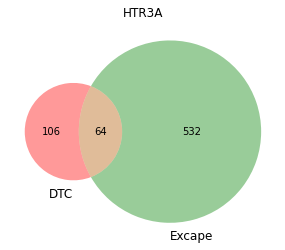

In [ ]:
# Plot venn3 distribution 
d1_s = d1a_df['rdkit_smiles'].tolist()
d2_s = d2a_df['rdkit_smiles'].tolist()
#display(d1_s)
#display(d2_s)
dlst = [set(d1_s),set(d2_s)]

fig = plt.figure()
venn2(dlst, ('DTC', 'Excape'))
plt.title(target_name)
#fig.savefig('./plots/'+target_name+'_union_venn.png')
#fig

## Combine d1a_df and d2a_df dataframes 

In [ ]:
comb_df=pd.concat([d1a_df, d2a_df])

In [ ]:
comb_df.columns

Index(['compound_id', 'rdkit_smiles', 'PXC50', 'active'], dtype='object')

In [ ]:
comb_df.head(5)

,compound_id,rdkit_smiles,PXC50,active
0,WLYLIKBNGQZDFH-UHFFFAOYSA-N,O=C(NCCCN1CCOCC1)c1ccc2c(=O)n(Cc3ccc(Cl)cc3)c(...,5.886057,0
1,PNHTUMMCJLWVTR-UHFFFAOYSA-N,COc1ccc(-c2cc(NC(=O)CCCCN3CCCOCC3)n[nH]2)cc1,4.522879,0
2,PYCJRTFNOGPLEL-UHFFFAOYSA-N,Nn1c(CCCCN2CCN(c3ccc4ccccc4n3)CC2)nc2cc(Cl)ccc...,7.000000,1
3,MMIPHEFKLSFNNB-MWGLOKQDSA-L,COc1ccc(C[N+]23CCC4C5C6C(CC42)C(=CCOC6N2c4cccc...,4.511439,0
4,PWVBQEUMVVPFJT-UHFFFAOYSA-N,Nn1c(CCCCN2CCN(c3ccc4ccccc4n3)CC2)nc2cc(F)ccc2...,7.000000,1


In [ ]:
ofile=target_name+'_combine_curated.csv'

# column: Response values column
column = 'PXC50'

# tolerance: Percentage of individual respsonse values allowed to different 
# from the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 1

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

curated_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       comb_df, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (766, 8)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, PXC50, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (702, 8)
New column created with averaged values:  VALUE_NUM_mean


Post-processing dataset

Total Number of results = 702
dataset mean = 6.738187704369989 NM
dataset stdev = 1.5379201957059792 NM
dataset max = 10.5 NM
dataset min = 3.06 NM



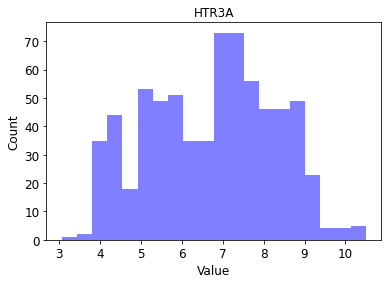

In [ ]:
# Define the outcome column as PXC50
column = 'PXC50'

# # of 'bins' for the histogram
num_bins = 20

title = target_name

units = 'NM'

filepath = ""

data=curated_df

curate_data.summarize_data(column, num_bins, title, units, filepath, data)

In [ ]:
feat_type='ECFP'
dist_metric='tanimoto'

smiles_lst1 = d1a_df['rdkit_smiles'].tolist()
smiles_lst2 = d2a_df['rdkit_smiles'].tolist()

## Have the dataset with more compounds be the point of reference

if len(smiles_lst1) > len(smiles_lst2) :
    s1,s2=smiles_lst1,smiles_lst2
else:
    s1,s2=smiles_lst2,smiles_lst1
calc_type='nearest'
dist_sample=cd.calc_dist_smiles(feat_type,dist_metric,s1,s2,calc_type)

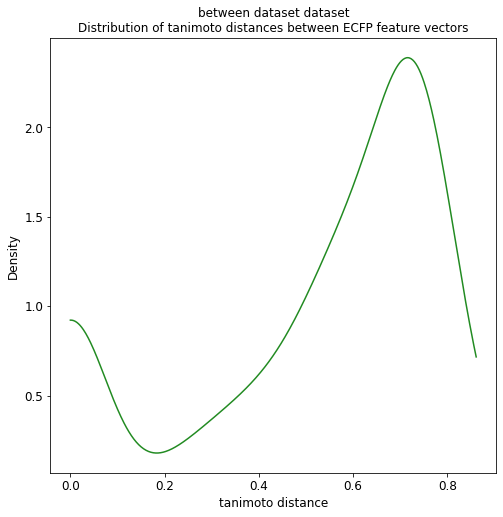

In [ ]:
from scipy.stats.kde import gaussian_kde

import numpy as np
import matplotlib.pyplot as plt

odir='./'
task_name='between dataset'
dist_pdf = gaussian_kde(dist_sample)
x_plt = np.linspace(min(dist_sample), max(dist_sample), 500)
y_plt = dist_pdf(x_plt)    
fig, ax = plt.subplots(figsize=(8.0,8.0))
ax.plot(x_plt, y_plt, color='forestgreen')
ax.set_xlabel('%s distance' % dist_metric)
ax.set_ylabel('Density')
ax.set_title("%s dataset\nDistribution of %s distances between %s feature vectors" % (
              task_name, dist_metric, feat_type))
fig.savefig(odir+'distance_to_background_mol.png')